In [162]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline
df=pd.read_csv('data_stocks.csv')

In [163]:
df.head()

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
0,1491226200,2363.6101,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.52,...,84.370,119.035,44.40,39.88,82.03,7.36,50.22,63.86,122.000,53.350
1,1491226260,2364.1001,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.48,...,84.370,119.035,44.11,39.88,82.03,7.38,50.22,63.74,121.770,53.350
2,1491226320,2362.6799,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.93,...,84.585,119.260,44.09,39.98,82.02,7.36,50.12,63.75,121.700,53.365
3,1491226380,2364.3101,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.44,...,84.460,119.260,44.25,39.99,82.02,7.35,50.16,63.88,121.700,53.380
4,1491226440,2364.8501,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.60,...,84.470,119.610,44.11,39.96,82.03,7.36,50.20,63.91,121.695,53.240


In [164]:
df.shape

(41266, 502)

In [165]:
df.set_index(df.columns.tolist()[0],inplace=True)

In [166]:
df.head()

,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,NASDAQ.AMAT,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
DATE,,,,,,,,,,,,,,,,,,,,,
1491226200,2363.6101,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.52,38.99,...,84.370,119.035,44.40,39.88,82.03,7.36,50.22,63.86,122.000,53.350
1491226260,2364.1001,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.48,39.01,...,84.370,119.035,44.11,39.88,82.03,7.38,50.22,63.74,121.770,53.350
1491226320,2362.6799,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.93,38.91,...,84.585,119.260,44.09,39.98,82.02,7.36,50.12,63.75,121.700,53.365
1491226380,2364.3101,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.44,38.84,...,84.460,119.260,44.25,39.99,82.02,7.35,50.16,63.88,121.700,53.380
1491226440,2364.8501,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.60,38.93,...,84.470,119.610,44.11,39.96,82.03,7.36,50.20,63.91,121.695,53.240


In [167]:
df.drop('SP500',axis=1,inplace=True)

In [168]:
from sklearn import cluster, datasets as dt

In [169]:
n_clusters = 5

In [170]:
np.random.seed(0)
k_Means = cluster.KMeans(n_clusters=n_clusters,random_state=25)
k_Means.fit(df)
print('Over')

Over


In [171]:
k_Means.labels_

array([4, 4, 4, ..., 3, 3, 3])

In [172]:
len(k_Means.labels_)


41266

In [173]:
(k_Means.cluster_centers_)

array([[  51.72587735,  151.06200533,  146.92356499, ...,   74.45093304,
         125.61319585,   62.33830194],
       [  45.09849074,  151.07393826,  135.6250932 , ...,   68.61520574,
         118.89374393,   58.85615306],
       [  49.26457875,  148.64841274,  141.54205293, ...,   73.30668488,
         124.86423224,   62.56597652],
       [  46.2734716 ,  160.11520883,  150.24007608, ...,   76.00650235,
         112.7923117 ,   61.19815181],
       [  43.77358132,  142.98696747,  130.74934798, ...,   64.62368362,
         120.79942516,   53.63660808]])

In [174]:
df['Cluster_No']=k_Means.labels_

In [175]:
df['Cluster_No'].value_counts()

2    12029
0     8905
4     6976
1     6709
3     6647
Name: Cluster_No, dtype: int64

In [176]:
companyMean = df.apply(np.mean,axis=0)
companyM = companyMean.tolist()[:len(df.columns)-1]

companyName = df.columns.tolist()[:len(df.columns)-1]

companyStd = df.apply(np.std,axis=0)
companyStdD =companyStd.tolist()[:len(df.columns)-1]

companyData = pd.DataFrame({'Company':companyName, 'cMean': companyM,'cStd':companyStdD}) 

In [177]:
companyData.sort_values('cStd',ascending=False).head()

,Company,cMean,cStd
91,NASDAQ.PCLN,1867.722306,78.341014
163,NYSE.AZO,598.324633,76.696839
65,NASDAQ.ISRG,901.320301,66.399068
199,NYSE.CMG,417.670807,63.347703
96,NASDAQ.REGN,457.676948,46.809471


In [178]:
df_1= df.loc[df.Cluster_No == 0,:]
df_2= df.loc[df.Cluster_No == 1,:]
df_3= df.loc[df.Cluster_No == 2,:]
df_4= df.loc[df.Cluster_No == 3,:]
df_5= df.loc[df.Cluster_No == 4,:]

In [179]:
companyMean = df_1.apply(np.mean,axis=0)
companyM = companyMean.tolist()[:len(df_1.columns)-1]

companyName = df_1.columns.tolist()[:len(df_1.columns)-1]

companyStd = df_1.apply(np.std,axis=0)
companyStdD =companyStd.tolist()[:len(df_1.columns)-1]

companydf_1 = pd.DataFrame({'Company':companyName, 'cMean': companyM,'cStd':companyStdD}) 

In [180]:
companydf_1.head()

,Company,cMean,cStd
0,NASDAQ.AAL,51.725877,1.430593
1,NASDAQ.AAPL,151.062005,4.324873
2,NASDAQ.ADBE,146.923565,2.093385
3,NASDAQ.ADI,79.556993,1.031093
4,NASDAQ.ADP,107.410306,5.979057


In [181]:
companyData.sort_values('cStd',ascending=False,inplace=True)
companydf_1.sort_values('cStd',ascending=False,inplace=True)

In [182]:
companyData.head()

,Company,cMean,cStd
91,NASDAQ.PCLN,1867.722306,78.341014
163,NYSE.AZO,598.324633,76.696839
65,NASDAQ.ISRG,901.320301,66.399068
199,NYSE.CMG,417.670807,63.347703
96,NASDAQ.REGN,457.676948,46.809471


In [183]:
companydf_1.head()

,Company,cMean,cStd
91,NASDAQ.PCLN,1992.227976,41.105572
199,NYSE.CMG,364.615179,25.146872
11,NASDAQ.AMZN,1010.326946,22.047485
21,NASDAQ.CHTR,358.311887,19.844799
52,NASDAQ.GOOGL,963.180313,18.290805


In [184]:
companyData.set_index('Company',inplace=True)


In [185]:
companydf_1.set_index('Company',inplace=True)

In [186]:
df_4.shape

(6647, 501)

In [187]:
companydf_1.head()

,cMean,cStd
Company,,
NASDAQ.PCLN,1992.227976,41.105572
NYSE.CMG,364.615179,25.146872
NASDAQ.AMZN,1010.326946,22.047485
NASDAQ.CHTR,358.311887,19.844799
NASDAQ.GOOGL,963.180313,18.290805


In [188]:
companyMean = df_2.apply(np.mean,axis=0)
companyM = companyMean.tolist()[:len(df_2.columns)-1]

companyName = df_2.columns.tolist()[:len(df_2.columns)-1]

companyStd = df_2.apply(np.std,axis=0)
companyStdD =companyStd.tolist()[:len(df_2.columns)-1]

companydf_2 = pd.DataFrame({'Company':companyName, 'cMean': companyM,'cStd':companyStdD}) 

In [189]:
companyMean = df_3.apply(np.mean,axis=0)
companyM = companyMean.tolist()[:len(df_3.columns)-1]

companyName = df_3.columns.tolist()[:len(df_3.columns)-1]

companyStd = df_3.apply(np.std,axis=0)
companyStdD =companyStd.tolist()[:len(df_3.columns)-1]

companydf_3 = pd.DataFrame({'Company':companyName, 'cMean': companyM,'cStd':companyStdD}) 

In [190]:
companyMean = df_4.apply(np.mean,axis=0)
companyM = companyMean.tolist()[:len(df_4.columns)-1]

companyName = df_4.columns.tolist()[:len(df_4.columns)-1]

companyStd = df_4.apply(np.std,axis=0)
companyStdD =companyStd.tolist()[:len(df_4.columns)-1]

companydf_4 = pd.DataFrame({'Company':companyName, 'cMean': companyM,'cStd':companyStdD}) 

In [191]:
companyMean = df_5.apply(np.mean,axis=0)
companyM = companyMean.tolist()[:len(df_5.columns)-1]

companyName = df_5.columns.tolist()[:len(df_5.columns)-1]

companyStd = df_5.apply(np.std,axis=0)
companyStdD =companyStd.tolist()[:len(df_5.columns)-1]

companydf_5 = pd.DataFrame({'Company':companyName, 'cMean': companyM,'cStd':companyStdD}) 

In [192]:
companydf_5.head()

,Company,cMean,cStd
0,NASDAQ.AAL,43.773581,1.721192
1,NASDAQ.AAPL,142.986967,1.262053
2,NASDAQ.ADBE,130.749348,1.390138
3,NASDAQ.ADI,78.727689,1.552295
4,NASDAQ.ADP,102.573072,1.207861


In [193]:
companydf_2.set_index('Company',inplace=True)
companydf_3.set_index('Company',inplace=True)
companydf_4.set_index('Company',inplace=True)
companydf_5.set_index('Company',inplace=True)

In [194]:
companydf_2.head()

,cMean,cStd
Company,,
NASDAQ.AAL,45.098491,1.478944
NASDAQ.AAPL,151.073938,3.785890
NASDAQ.ADBE,135.625093,1.421433
NASDAQ.ADI,78.213720,2.162841
NASDAQ.ADP,99.105261,2.587922


In [195]:
companyData['Cluster_1_Mean']=companydf_1.cMean
companyData['Cluster_2_Mean']=companydf_2.cMean
companyData['Cluster_3_Mean']=companydf_3.cMean
companyData['Cluster_4_Mean']=companydf_4.cMean
companyData['Cluster_5_Mean']=companydf_5.cMean

In [196]:
companyData['Cluster_1_Std']=companydf_1.cStd
companyData['Cluster_2_Std']=companydf_2.cStd
companyData['Cluster_3_Std']=companydf_3.cStd
companyData['Cluster_4_Std']=companydf_4.cStd
companyData['Cluster_5_Std']=companydf_5.cStd

In [197]:
companyData.head()

,cMean,cStd,Cluster_1_Mean,Cluster_2_Mean,Cluster_3_Mean,Cluster_4_Mean,Cluster_5_Mean,Cluster_1_Std,Cluster_2_Std,Cluster_3_Std,Cluster_4_Std,Cluster_5_Std
Company,,,,,,,,,,,,
NASDAQ.PCLN,1867.722306,78.341014,1992.227976,1848.808425,1861.036039,1831.703246,1772.828103,41.105572,37.515946,26.179982,29.979041,17.485453
NYSE.AZO,598.324633,76.696839,516.246706,687.793454,590.770040,521.993111,702.812512,16.607688,14.098184,26.866113,8.289924,8.821414
NASDAQ.ISRG,901.320301,66.399068,942.628129,850.114460,924.396511,976.244296,786.654340,9.697559,13.179252,16.860209,19.677591,28.612941
NYSE.CMG,417.670807,63.347703,364.615179,482.611264,449.560705,316.192173,464.646114,25.146872,7.184968,26.506990,9.434518,12.778987
NASDAQ.REGN,457.676948,46.809471,496.393374,430.232695,483.194189,475.714862,373.460891,16.965731,23.184139,21.629249,8.629385,6.040844


In [198]:
companyData['lift_1']=pd.Series(companyData.cStd/companyData.Cluster_1_Std)

In [199]:
companyData.reset_index(inplace=True)

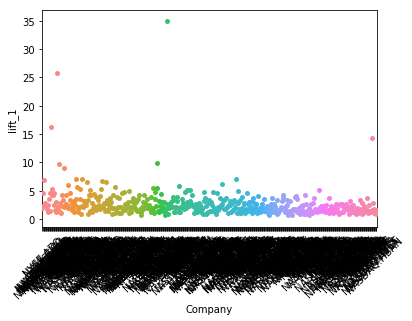

In [200]:
import seaborn as sns

g=sns.swarmplot(x='Company',y='lift_1',data=companyData);

plt.xticks(rotation=45)
plt.show()

In [201]:
companyData.sort_values('lift_1',inplace=True,ascending=False)

In [202]:
companyData.lift_1.head()

43           inf
187    34.848157
22     25.800289
13     16.166194
492    14.218695
Name: lift_1, dtype: float64

In [203]:
companyData.head()

,Company,cMean,cStd,Cluster_1_Mean,Cluster_2_Mean,Cluster_3_Mean,Cluster_4_Mean,Cluster_5_Mean,Cluster_1_Std,Cluster_2_Std,Cluster_3_Std,Cluster_4_Std,Cluster_5_Std,lift_1
43,NYSE.BHI,49.548778,9.937995,37.500000,58.670426,54.032304,37.500000,59.906161,0.000000,0.890649,4.620896,0.000000,1.023010,inf
187,NASDAQ.WFM,38.597809,3.723485,41.847158,36.441194,38.458441,41.842640,33.672547,0.106849,0.288056,3.746620,0.112167,2.329673,34.848157
22,NYSE.BLL,51.297688,15.874231,41.967337,70.049010,41.366861,39.896998,73.161572,0.615273,16.631722,0.746127,0.575737,1.278472,25.800289
13,NYSE.BCR,306.158251,22.395830,319.951421,306.783631,313.788689,319.515758,262.064540,1.385350,0.895573,2.783448,0.789329,22.179882,16.166194
492,NASDAQ.SPLS,9.666552,0.506469,10.127173,9.372745,9.198735,10.194637,9.664619,0.035620,0.378554,0.419373,0.018871,0.278150,14.218695


In [204]:
companyData.shape

(500, 14)